In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', font_scale=1.5)

In [2]:
## Калибровка

termopara_V = np.array([41, 34.8, 35.85, 37.1])
pirometr_T = np.array([1060, 900, 931, 959])
termopara_T = np.array(([1010, 855, 880, 910]))
percenteges = (1 - termopara_T/pirometr_T) * 100
print("Отклонения в процентах температуры пирометра от температуры термопары:\n",percenteges)

Отклонения в процентах температуры пирометра от температуры термопары:
 [4.71698113 5.         5.47798067 5.10948905]


In [3]:
## Яркостная температура колец разная

In [28]:
## Лампа
temp_lampa = np.array([910, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]) #C
V_lampa = np.array([1.605, 1.976, 2.359, 2.916, 3.390, 3.892, 5.374, 5.824, 7.531, 8.618]) #Volts
I_lampa = np.array([0.507, 0.547, 0.587, 0.640, 0.684, 0.729, 0.849, 0.882, 1, 1.073]) #Ampers
assert V_lampa.size == temp_lampa.size, "sizes of arrays are not equal"

W = V_lampa * I_lampa

xlog = np.log(temp_lampa)
y_raw_log = np.log(W)

pn = np.polyfit(xlog, y_raw_log, 1)
ylog = np.polyval(pn, xlog)

T = np.array([920,1020,1130,1240,1345,1450,1560,1670,1780,1890])

xTlog = np.log(T)
y_T_log = np.log(W)

pTn = np.polyfit(xTlog, y_T_log, 1)
yTlog = np.polyval(pTn, xTlog)
W



array([0.813735, 1.080872, 1.384733, 1.86624 , 2.31876 , 2.837268,
       4.562526, 5.136768, 7.531   , 9.247114])

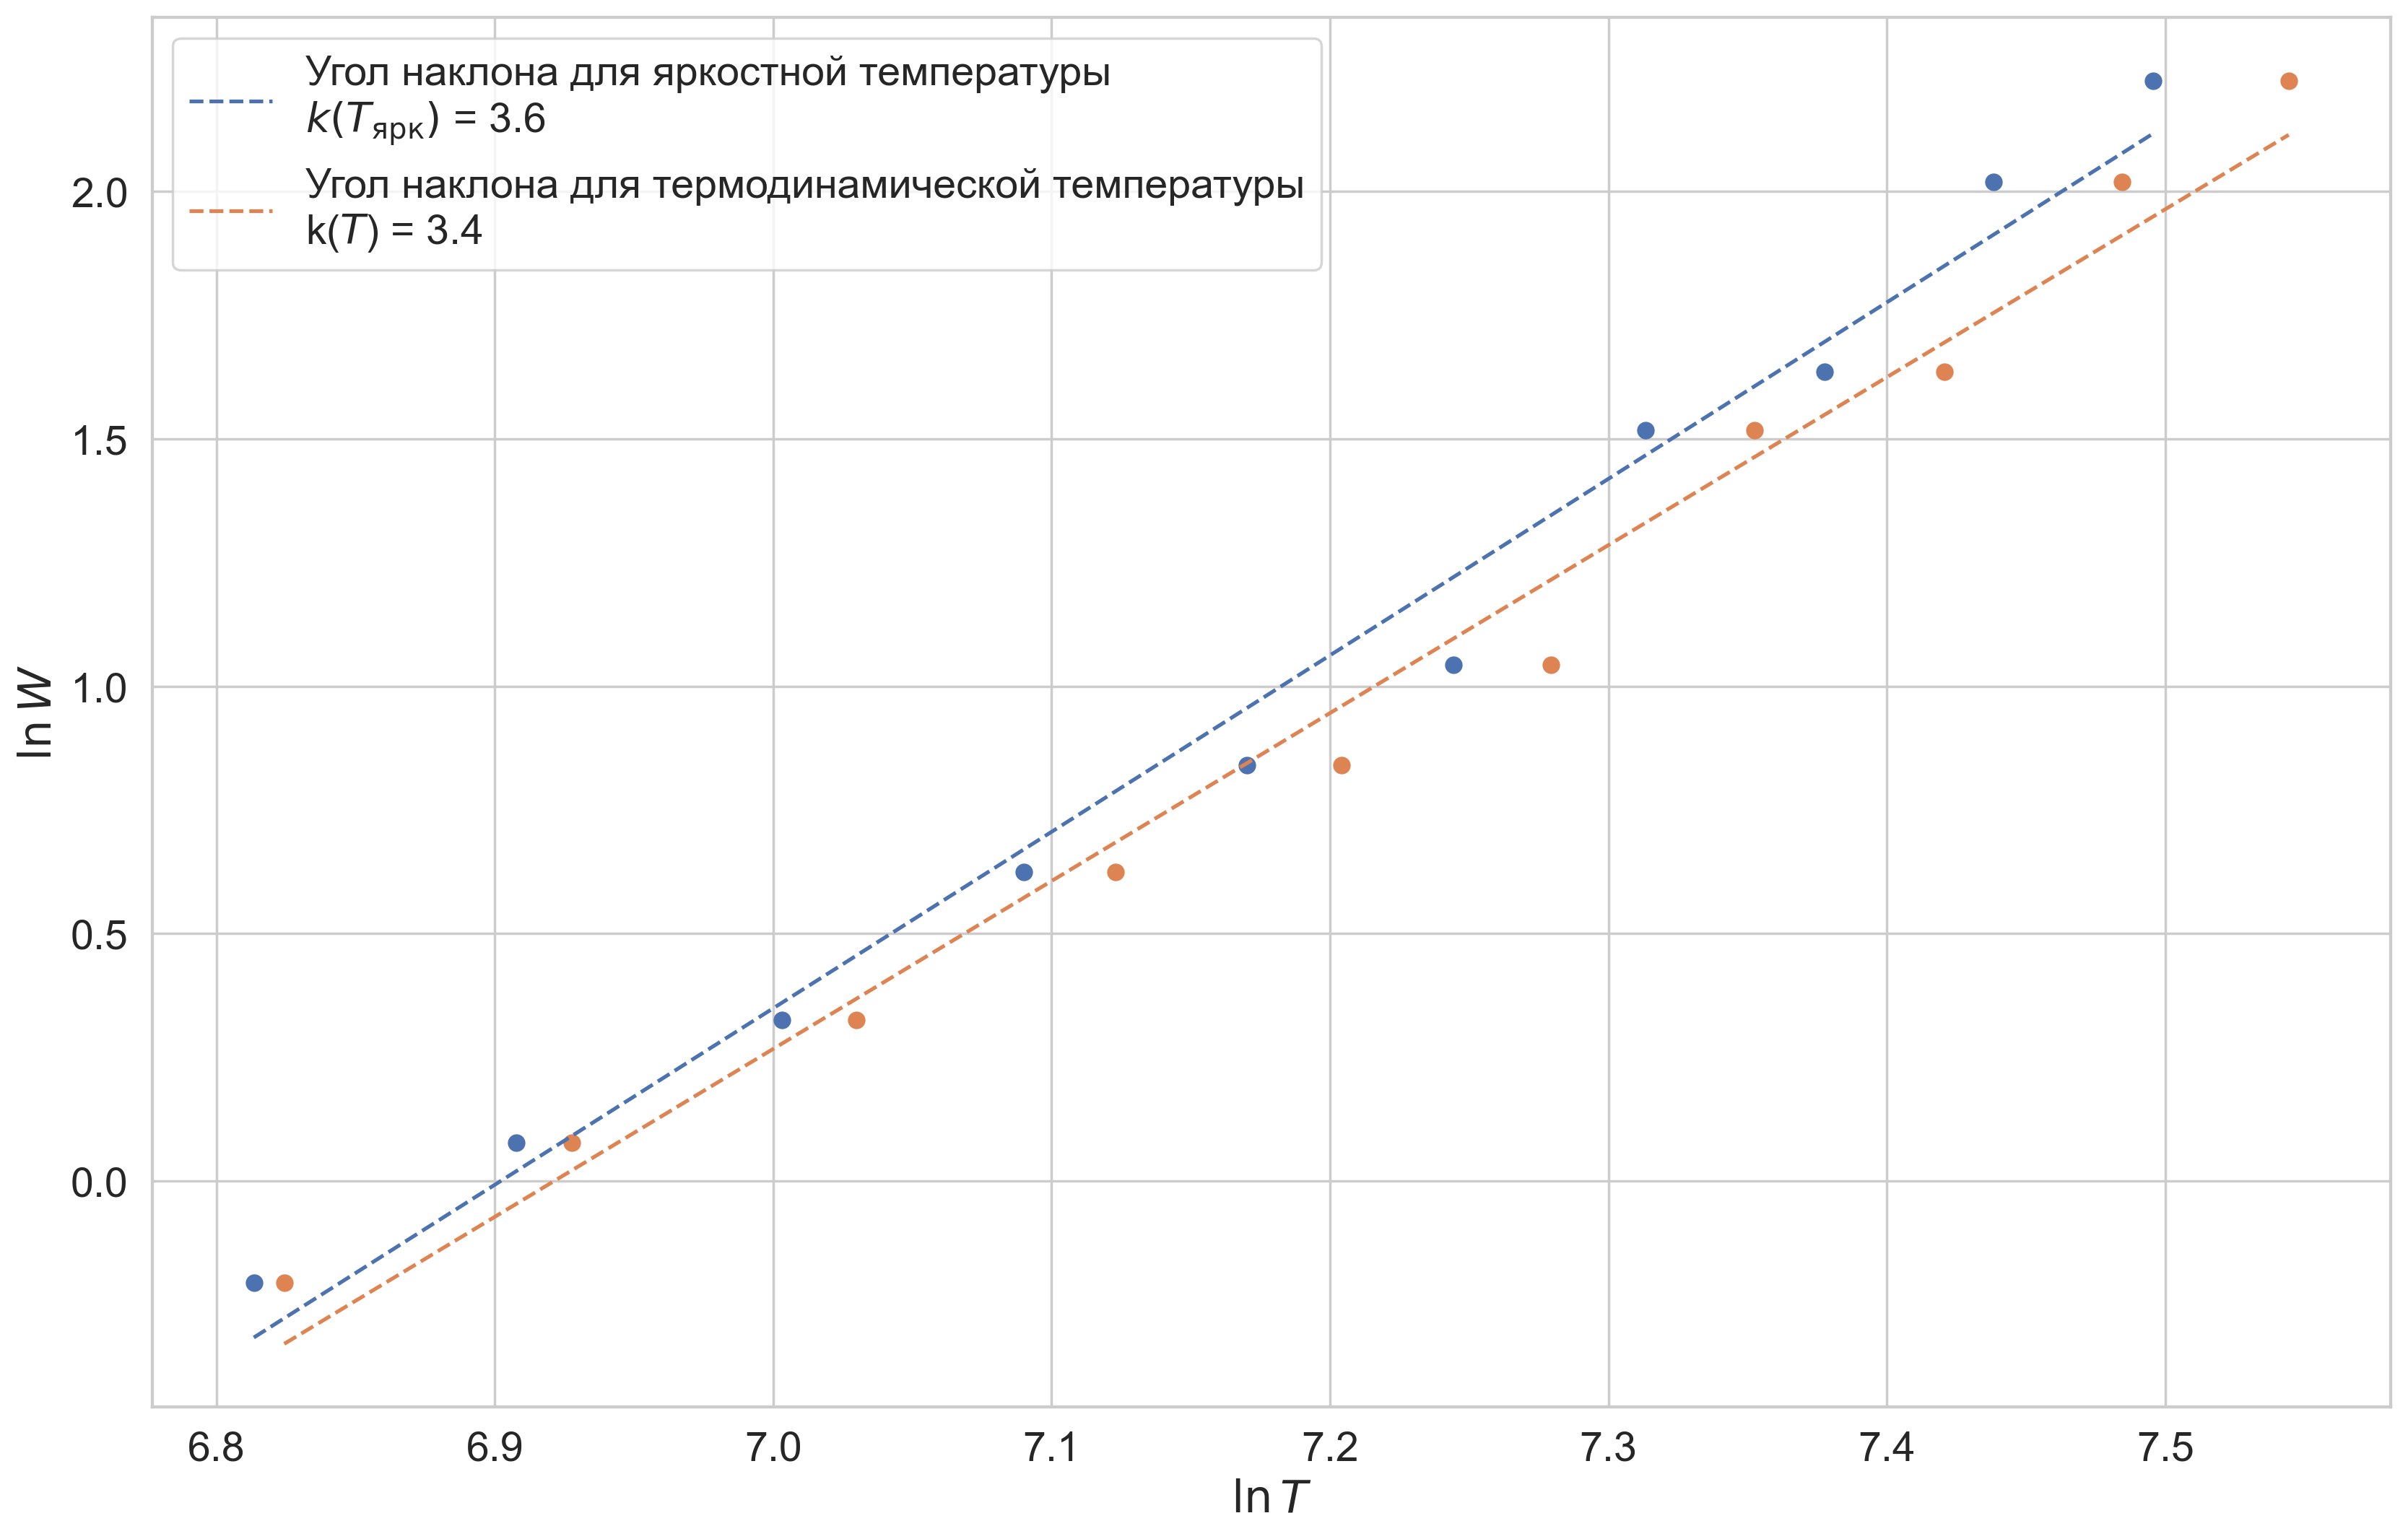

In [27]:
plt.figure(figsize = (16,10), dpi= 250)

plt.scatter(xlog, y_raw_log)
plt.plot(xlog, ylog, linestyle= '--', label = f'Угол наклона для яркостной температуры\n$k(T_\\text{{ярк}})$ = {pn[0]:.1f}')

plt.scatter(xTlog, y_T_log)
plt.plot(xTlog, yTlog, linestyle= '--', label = f'Угол наклона для термодинамической температуры\nk($T$) = {pTn[0]:.1f}')


plt.xlabel('$\ln T$')
plt.ylabel('$\ln W$')
plt.legend()
plt.savefig('plotLog')

In [31]:
sigma = W[-2]/(0.244 * 0.36 * 1973 ** 4)
print(sigma)

5.657857167283743e-12


In [32]:
tmp = 2*np.pi**5 * (1.381 * 10**(-23))**4 / (15 * 299792458**2 * sigma*10000)
print(tmp**(1./3))

6.633200778216457e-34


In [37]:
cons =  (2*np.pi**5 * (1.381 * 10**(-23))**4 / (15 * 299792458**2))**(1./3) * (-1./3) * (sigma*10000)**(-4./3) * 0.03


In [36]:
cons

-1.1723874573173355e-31